# Titanic 生存分析

Kaggle入門經典題，參考HanXiaoyang哥的這篇：  
https://github.com/HanXiaoyang/Kaggle_Titanic/blob/master/Titanic.ipynb  

更重要的是：自已做一遍


In [38]:
import pandas as pd
import numpy as np

# 載入資料
# Kaggle已經整理好了漂亮的資料，但真實世界往往不是這樣
train = pd.read_csv('raw/train.csv')

# 先大概看一下
print('Data shape: {}'.format(train.shape))

Data shape: (891, 12)


In [39]:
# 看一下有那些欄位
# 要理解每個欄位的意義，建立起對資料的感覺，對後續的分析很重要。
print(train.columns)

# Kaggle網頁裡會有這些欄位的說明：
# SibSp: siblings / spouses 兄弟姐妹配偶
# parch: of parents / children aboard the Titanic
# Pclass: Ticket class, 分三個等級
# embarked: 登船地點

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [40]:
# 觀察資料的完整性
# 有沒有缺少？如果缺了，要怎麼處理呢？
train.info()

# Age跟Cabin欄位就有缺了！
# 一共有891列，有Age的才714列，而Cabin更只有204列有資料。對缺資料的點如何處理會是一個重要的議題。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [41]:
# 統計資料
train.describe()

# 問：pandas裡使用describe()跟info()有什麼不同？
# 答：describe是統計資料的描述， 統計資料很有用，但對於文字型的資料內容無法統計，所以搭配info()了解資料概況。

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

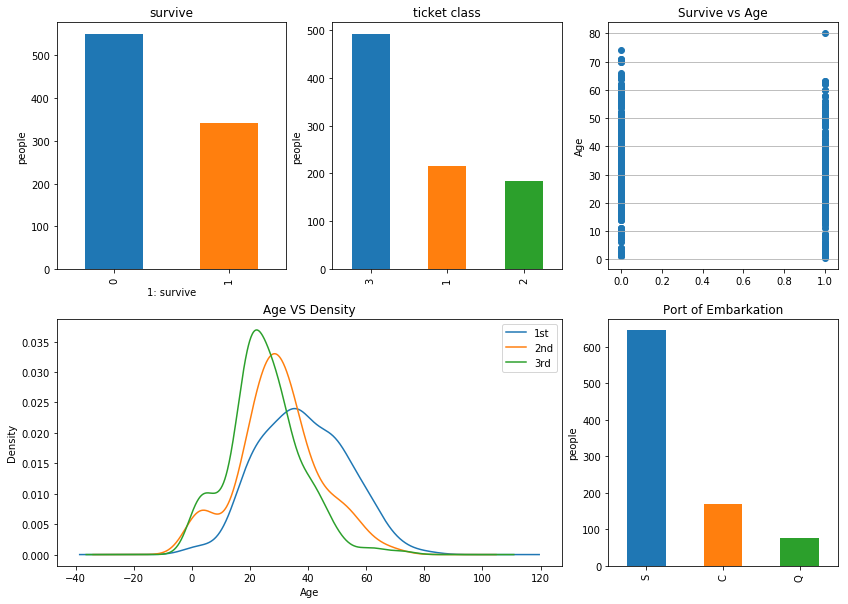

In [42]:
# 來畫圖看看
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 10))
fig.set(alpha=0.1)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0)) # 一個大圖切成許多個小圖
train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title('survive') # puts a title on our graph
plt.ylabel('people')  
plt.xlabel('1: survive')

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind="bar")
plt.ylabel('people')
plt.title('ticket class')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.ylabel('Age')                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title('Survive vs Age')

plt.subplot2grid((2,3),(1,0), colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')# plots an axis lable
plt.ylabel('Density') 
plt.title('Age VS Density')
plt.legend(('1st', '2nd', '3rd'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title('Port of Embarkation')
plt.ylabel('people')  

plt.show()

   survive  die
1      136   80
2       87   97
3      119  372


<Figure size 432x288 with 0 Axes>

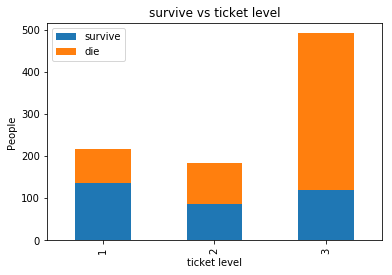

In [46]:
# 看看船艙等級與存活之間的關系

# 這裡有維度上的變化，X軸呈現船艙等級，共有三級
# Y軸呈現人數，並把存活跟死亡做分色處理。所以Y軸是根據Survive條件做Count
fig = plt.figure()
fig.set(alpha=0.2)


Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()

# train.Pclass 是一個乘客對艙等的Series
# train.Pclass[train.Srvived == 0] 也是一個Series，根據未存活乘客做過濾。
# 經過.value_counts()計數後，變成艙等對人數(存活/未存活)的關系
# 把資料印出來看一下變換的過程
# 記得要開一份原始資料對照著看更有感覺


#print(train.Pclass)
#print(train.Pclass[train.Survived == 0])
#print(train.Pclass[train.Survived == 0].value_counts())

# 兩個Series整合成一個Dataframe
df1 = pd.DataFrame({'survive':Survived_1, 'die':Survived_0})
print(df1)

df1.plot(kind='bar', stacked=True)
plt.title('survive vs ticket level')
plt.xlabel('ticket level') 
plt.ylabel('People') 


plt.show()

# 一等艙的獲救機率看起來有比較高


   male  female
0   468      81
1   109     233


<Figure size 432x288 with 0 Axes>

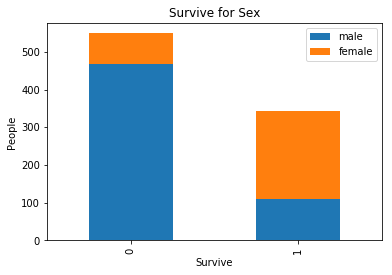

In [47]:
# 性別與存活的關系

fig = plt.figure()
fig.set(alpha=0.2)


Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()

df1 = pd.DataFrame({'male':Survived_m, 'female':Survived_f})
print(df1)
df1.plot(kind='bar', stacked=True)
plt.title('Survive for Sex')
plt.xlabel('Survive') # x軸的意義，在HanXiaoyang的參考連結裡有筆誤，誤寫為性別了，這裡更正為存活與否。
plt.ylabel('People')
plt.show()

# 解讀：
# 1) 0為死亡，藍色為男，橘色為女，男的佔比高。
# 2) 1為存活
# 女性存活率高

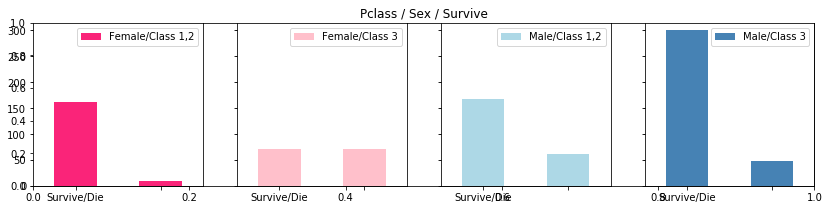

In [48]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(14, 3))
fig.set(alpha=0.65)
plt.title('Pclass / Sex / Survive')

# subplot 大圖裡放小圖
# .add_subplot(141) 表示這些小圖是 1 row, 4 columns,目前位置是 1
# pandas裡方括號類似SQL的where過濾語法
ax1=fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(
    kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(['Survive/Die'], rotation=0)
ax1.legend(['Female/Class 1,2'], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(
    kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(['Survive/Die'], rotation=0)
plt.legend(['Female/Class 3'], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(
    kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(['Survive/Die'], rotation=0)
plt.legend(['Male/Class 1,2'], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(['Survive/Die'], rotation=0)
plt.legend(['Male/Class 3'], loc='best')

plt.show()

# 重點來了，看看Cabin(船艙)
Cabin資料缺很大哦！如何應對？  
1) 探究一下為何會缺，會不會有線索？  
2) 退一步看，有/無Cabin是否會對生存率有影響？可以探究一下  
HanXiaoyang給了四個建議：  
1) 缺值項太多的話，拿來用的話，引進的雜訊可能都大於益處了，可以考慮就不要了吧。  
2) 缺值若是非連續性的，那就引入NaN  
3) 缺值若是連續性的，可以切割一下，做出一些群組，離散化，然後引入NaN  
4) 缺值若是連續性的，也可以試算一下，用差補點的方式，把中間的值補進去。(可不可以這樣做，就取決於對資料意義的理解力了)  
   比如透過隨機樹林做預測，來補入年齡缺值。  


1    136
0     68
Name: Survived, dtype: int64
0    481
1    206
Name: Survived, dtype: int64


<Figure size 432x288 with 0 Axes>

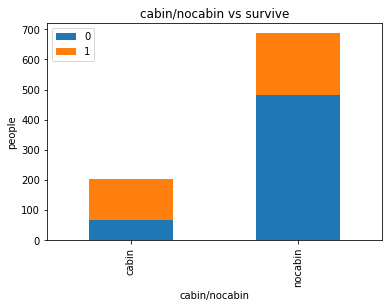

In [49]:
#cabin的值计数太分散了，绝大多数Cabin值只出现一次。感觉上作为类目，加入特征未必会有效
#那我们一起看看这个值的有无，对于survival的分布状况，影响如何吧
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()

print(Survived_cabin)
print(Survived_nocabin)

df1 = pd.DataFrame({'cabin':Survived_cabin, 'nocabin':Survived_nocabin}).transpose()
df1.plot(kind='bar', stacked=True)
plt.title('cabin/nocabin vs survive')
plt.xlabel('cabin/nocabin') 
plt.ylabel('people')
plt.show()

#似乎有cabin记录的乘客survival比例稍高，那先试试把这个值分为两类，有cabin值/无cabin值，一会儿加到类别特征好了

In [50]:
# 把有年齡記綠取出來做隨機森林迴歸，得到模型後，預測年齡缺值，填滿他。
# 年齡對存活率，直覺上就有很有關系，要努力補起來。

from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

df, rfr = set_missing_ages(train)
df = set_Cabin_type(df)
df

/home/handy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/home/handy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
5                                     Moran, Mr. James    male  23.838953   
6                              McCarthy, Mr. Timothy J    male  54.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
13                         Andersson, Mr. Anders Johan    male  39.000000   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                                Rice, Master. Eugene    male   2.000000   
17                        Williams, Mr. Charles Eugene    male  32.066493   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                             Masselmani, Mrs. Fatima  female  29.518205   
20                             

In [56]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')

df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

PassengerId  Survived        Age  SibSp  Parch      Fare  Cabin_No  \
0              1         0  22.000000      1      0    7.2500         1   
1              2         1  38.000000      1      0   71.2833         0   
2              3         1  26.000000      0      0    7.9250         1   
3              4         1  35.000000      1      0   53.1000         0   
4              5         0  35.000000      0      0    8.0500         1   
5              6         0  23.838953      0      0    8.4583         1   
6              7         0  54.000000      0      0   51.8625         0   
7              8         0   2.000000      3      1   21.0750         1   
8              9         1  27.000000      0      2   11.1333         1   
9             10         1  14.000000      1      0   30.0708         1   
10            11         1   4.000000      1      1   16.7000         0   
11            12         1  58.000000      0      0   26.5500         0   
12            13         0  20.000000      0      0    8.0500         1   
13            14         0  39.000000      1      5   31.2750         1   
14            15         0  14.000000      0      0    7.8542         1   
15            16         1  55.000000      0      0   16.0000         1   
16            17         0   2.000000      4      1   29.1250         1   
17            18         1  32.066493      0      0   13.0000         1   
18            19         0  31.000000      1      0   18.0000         1   
19            20         1  29.518205      0      0    7.2250         1   
20            21         0  35.000000      0      0   26.0000         1   
21            22         1  34.000000      0      0   13.0000         0   
22            23         1  15.000000      0      0    8.0292         1   
23            24         1  28.000000      0      0   35.5000         0   
24            25         0   8.000000      3      1   21.0750         1   
25            26         1  38.000000      1      5   31.3875         1   
26            27         0  29.518205      0      0    7.2250         1   
27            28         0  19.000000      3      2  263.0000         0   
28            29         1  22.380113      0      0    7.8792         1   
29            30         0  27.947206      0      0    7.8958         1   
..           ...       ...        ...    ...    ...       ...       ...   
861          862         0  21.000000      1      0   11.5000         1   
862          863         1  48.000000      0      0   25.9292         0   
863          864         0  10.869867      8      2   69.5500         1   
864          865         0  24.000000      0      0   13.0000         1   
865          866         1  42.000000      0      0   13.0000         1   
866          867         1  27.000000      1      0   13.8583         1   
867          868         0  31.000000      0      0   50.4958         0   
868          869         0  25.977889      0      0    9.5000         1   
869          870         1   4.000000      1      1   11.1333         1   
870          871         0  26.000000      0      0    7.8958         1   
871          872         1  47.000000      1      1   52.5542         0   
872          873         0  33.000000      0      0    5.0000         0   
873          874         0  47.000000      0      0    9.0000         1   
874          875         1  28.000000      1      0   24.0000         1   
875          876         1  15.000000      0      0    7.2250         1   
876          877         0  20.000000      0      0    9.8458         1   
877          878         0  19.000000      0      0    7.8958         1   
878          879         0  27.947206      0      0    7.8958         1   
879          880         1  56.000000      0      1   83.1583         0   
880          881         1  25.000000      0      1   26.0000         1   
881          882         0  33.000000      0      0    7.8958         1   
882          883         0  22

In [67]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
type(df['Age'])


# 在做scaler.fit()的時候卡住了。




pandas.core.series.Series

### feature engineering
在把特徵展開的過程，會讓特徵愈來愈多，可能會造成overfitting  

 - overfitting 怎麼處置？  
 1) 把feature變少一點，feature selection  
 2) 用更多的feature  
 - underfitting 怎麼處置？  
 1) 用更多的feature，做更多的feature engineering
 
### overfitting / underfitting 之間的取捨，其實就是對於偏差 / 變異 之間的取捨

### 思考題：
 - 解釋 overfitting / underfitting 與 bias / variance 的關系
 - 訓練集得分高，驗証集得分低，代表什麼現像？反之呢？
 
 
 